# Correlation analysis using deltas

In this notebook we study the correlation between the burned area during the fire season's months and some climate indexes for each pixel. We used delta time series instead of the traditional time series used in the "Correlation_Per75.ipynb" notebook".

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to unimodal fire seasons.

Then we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in the previous months. Firstly, we will consider the climate index delta time series of the previous month, i.e., if the fire season is May and June, we will use the data of April and May. After that, we will use the 2 previous months and 3 previous ones.

We consider the following climate indexes: NINO3.4, NAO, POLEUR, EA, EA/WR, SCAND, PNA and WP.

In [1]:
setwd("..")

In [2]:
source("scripts/correlation_functions.R")

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"
Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract

Loading required package: RColorBrewer


Loading objects:
  coast.lines


In [3]:
# Data requiered
load("data/ba_mon_time_series_masked.Rdata", verbose = T)
load("fireSeasonPer75_def.Rdata", verbose = T)

Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeasonPer75_def


## Data loading

In [4]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [5]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [6]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [7]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)
ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [8]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [9]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [10]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

In [11]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

## With no persistence

In [12]:
#' @title Get highest correlation per pixel
#' @description Function for obtaining the highest (in module) correlation of a pixel among all the significant correlations
# that its burned area has with all the climate indexes
#' @param is a row of a correlation dataframe
#' @return the value of the highest correlation
getMaxCorr <- function (row){
    if (all(is.na(row[-c(1,2)])) | sum(row[seq(4, length(row), 2)] < 0.05) < 1){
        return (NA)
    } else {
        ind = which(row[seq(4, length(row), 2)] < 0.05)
        ma = max(row[2*ind+1])
        mi = min(row[2*ind+1])
        if (abs(mi) > abs(ma)){
            return (mi)
        } else {
            return (ma)
        }
    }
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

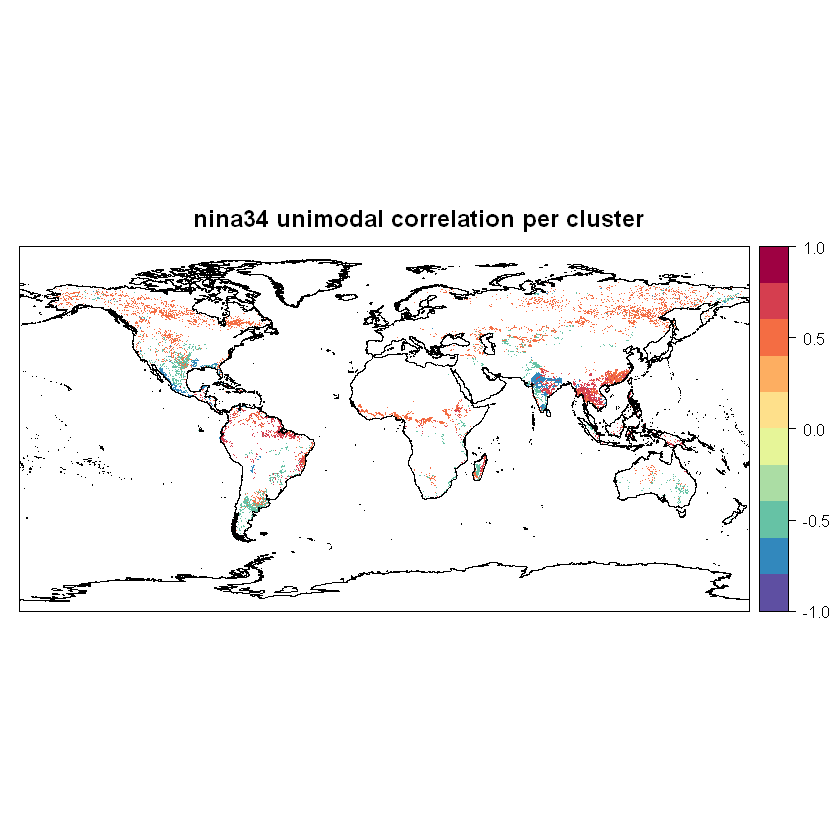

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

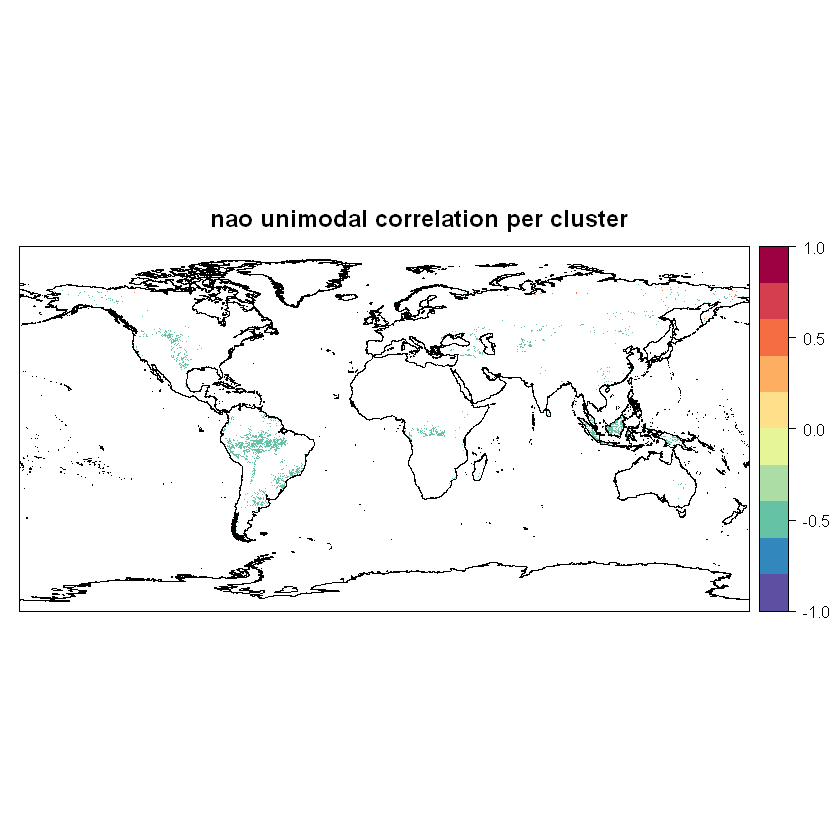

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

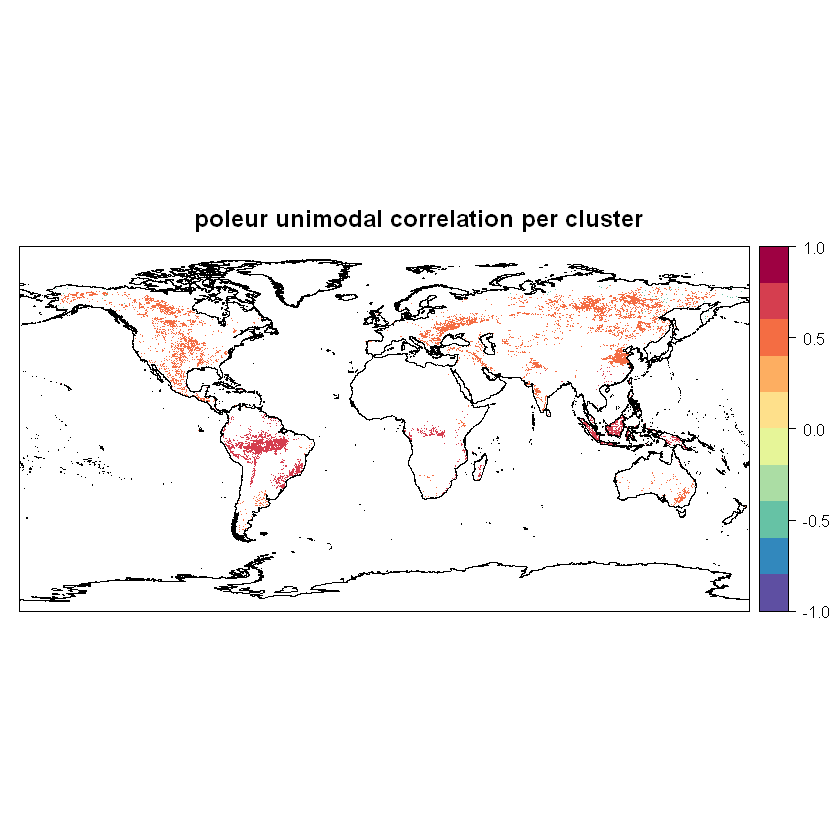

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

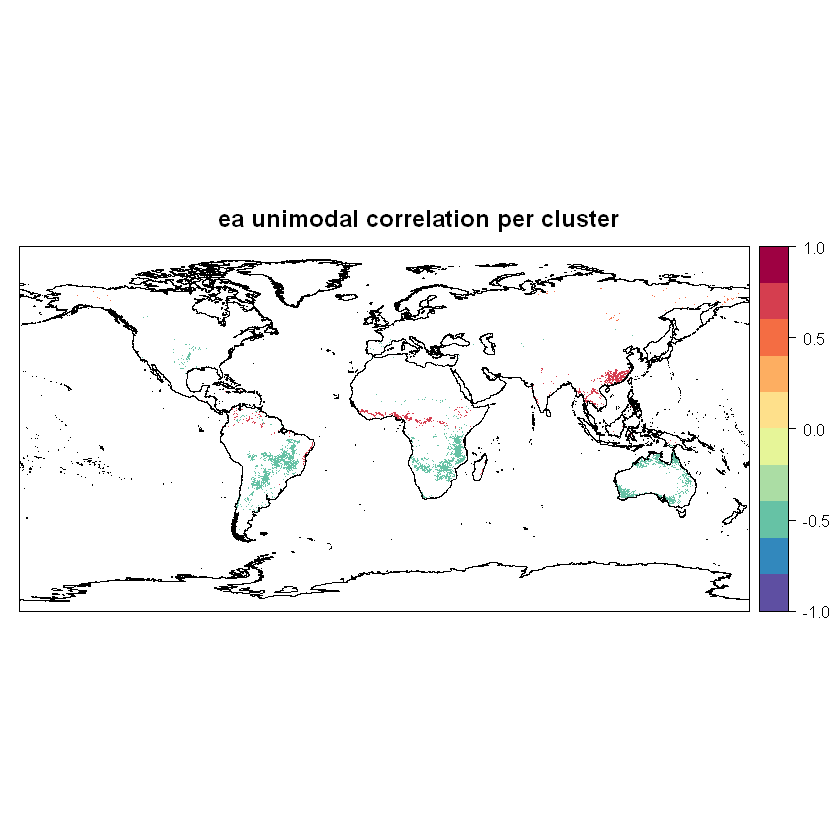

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

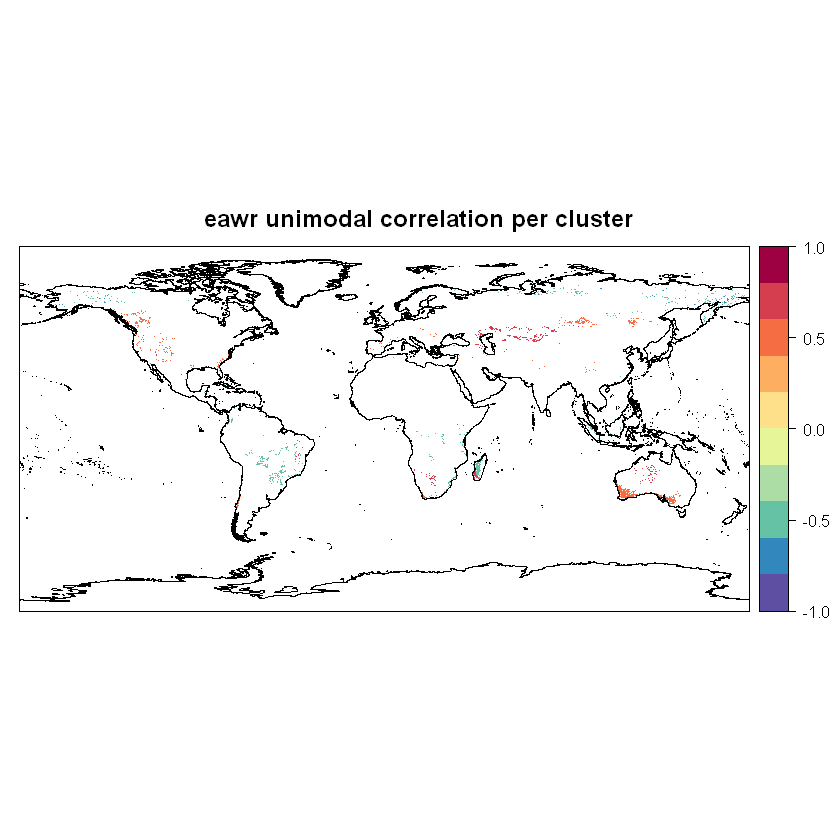

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

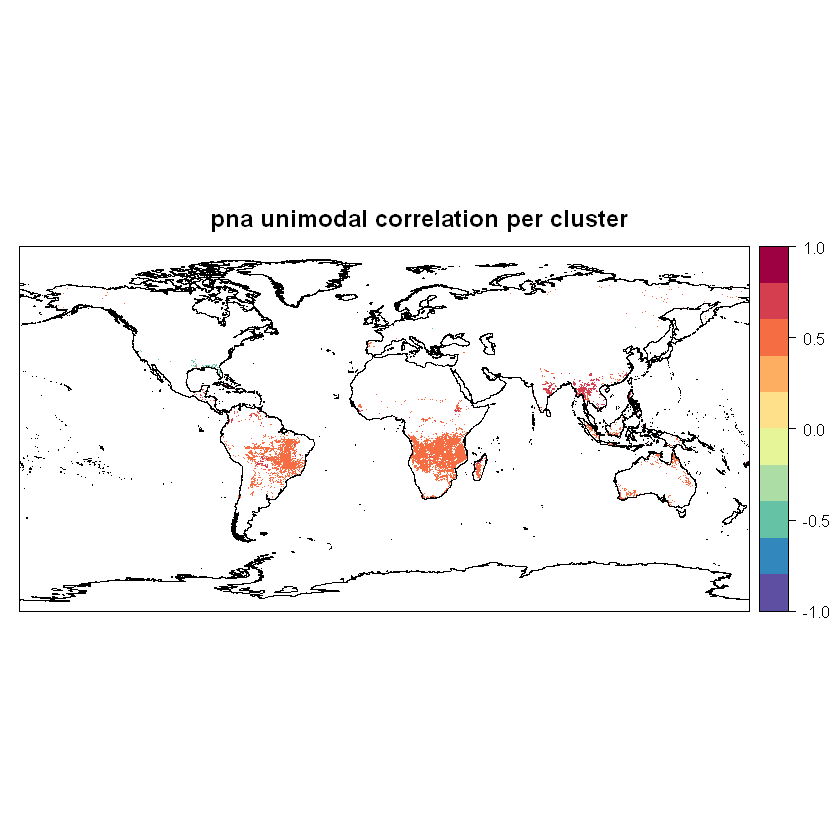

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

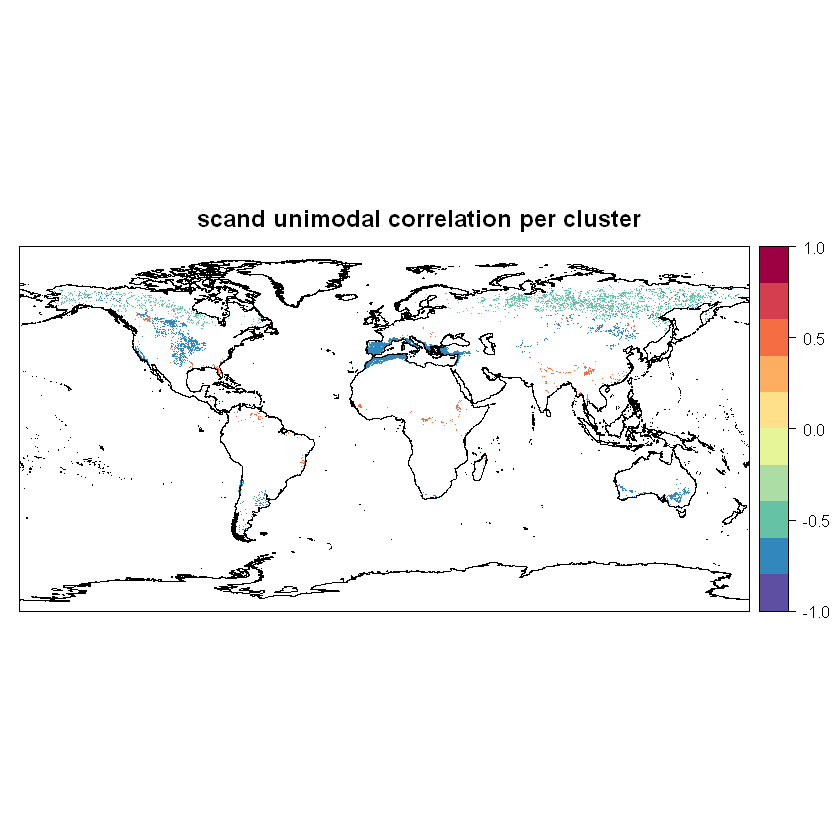

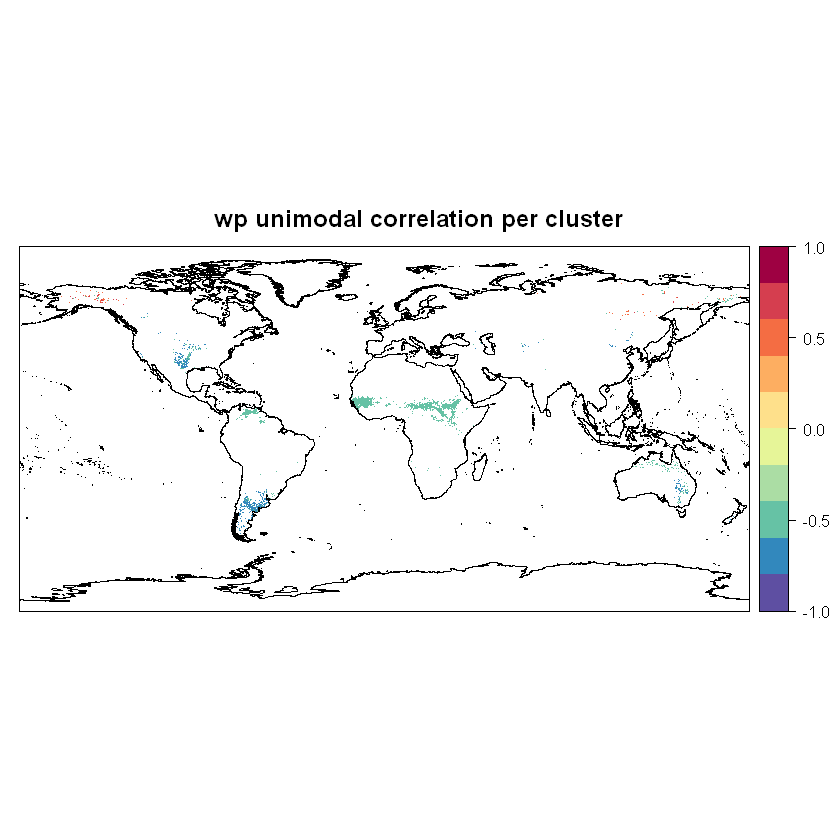

In [13]:
corr.df.delta = masked_coords
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)
corr.df.delta = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta, mode = 'unimodal', useDeltas = T)

#save(corr.df.delta, file = 'corrDfDeltaAnnualClus.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  55299 
Number of pixels correlated with more than  1  indexes  20987 
Number of pixels correlated with more than  2  indexes  1735 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


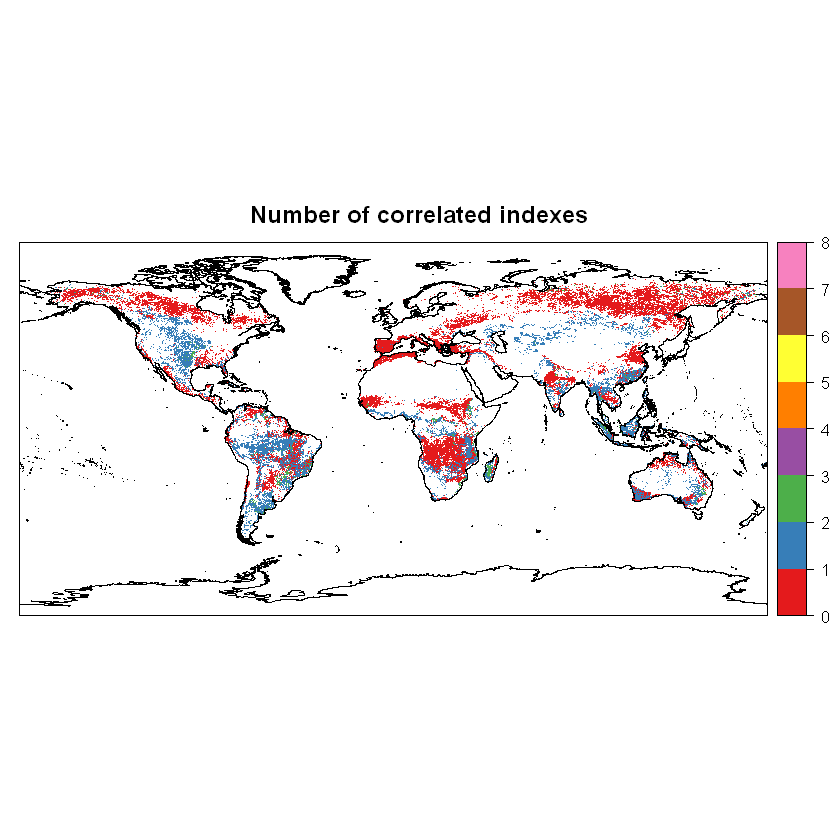

In [14]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta$nao.pvalue<0.05), as.numeric(corr.df.delta$poleur.pvalue<0.05), as.numeric(corr.df.delta$ea.pvalue<0.05),
          as.numeric(corr.df.delta$eawr.pvalue<0.05), as.numeric(corr.df.delta$pna.pvalue<0.05), as.numeric(corr.df.delta$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta$scand.pvalue<0.05), as.numeric(corr.df.delta$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

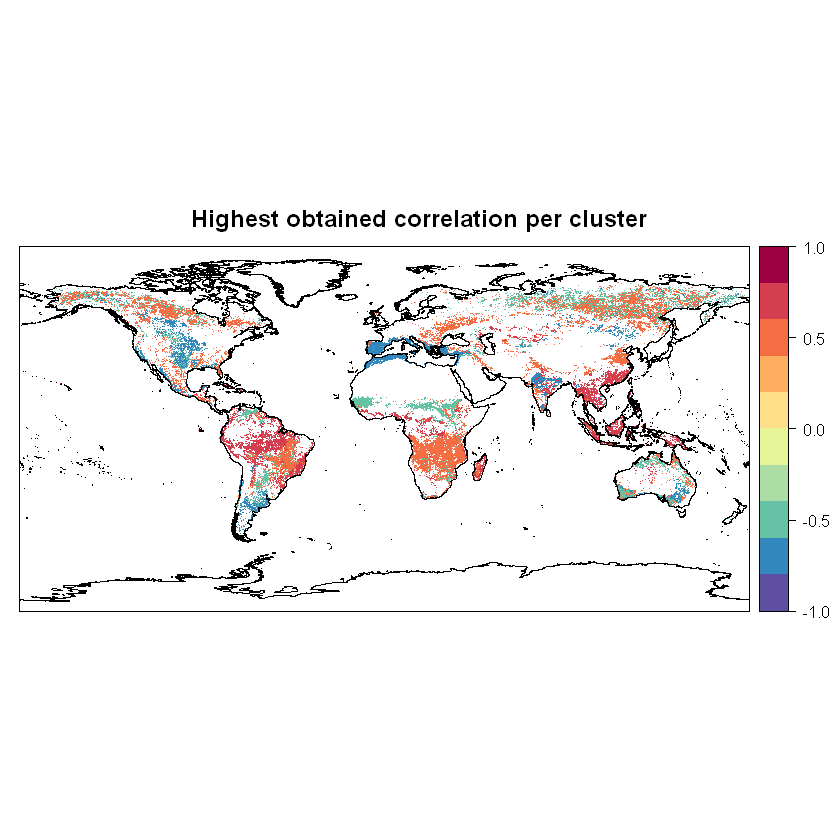

In [15]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest obtained correlation per cluster')

v = apply(corr.df.delta, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 1-month persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

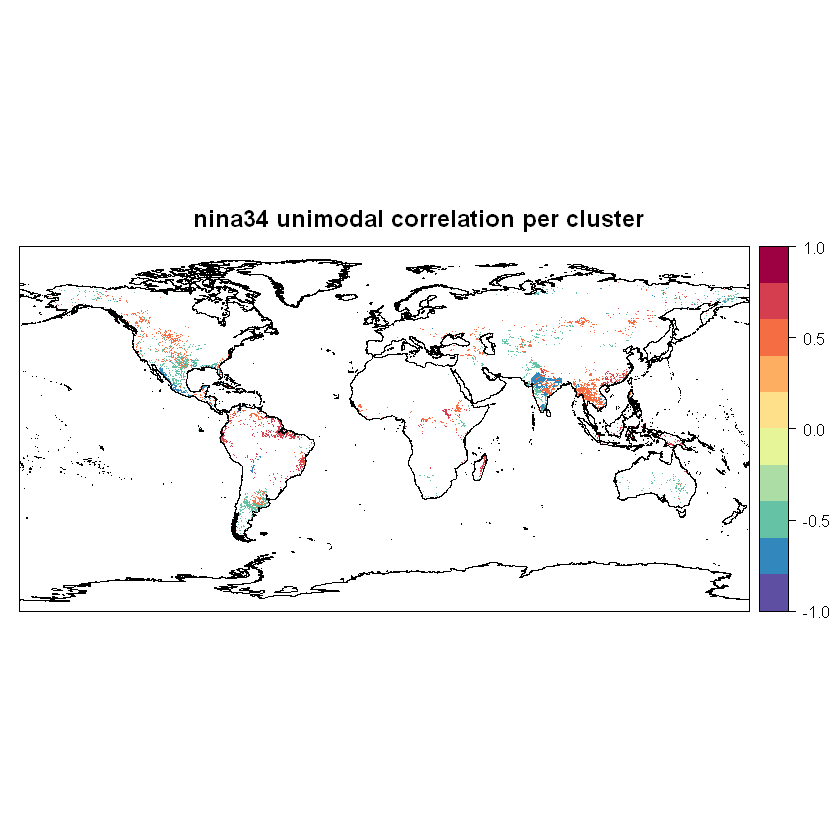

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

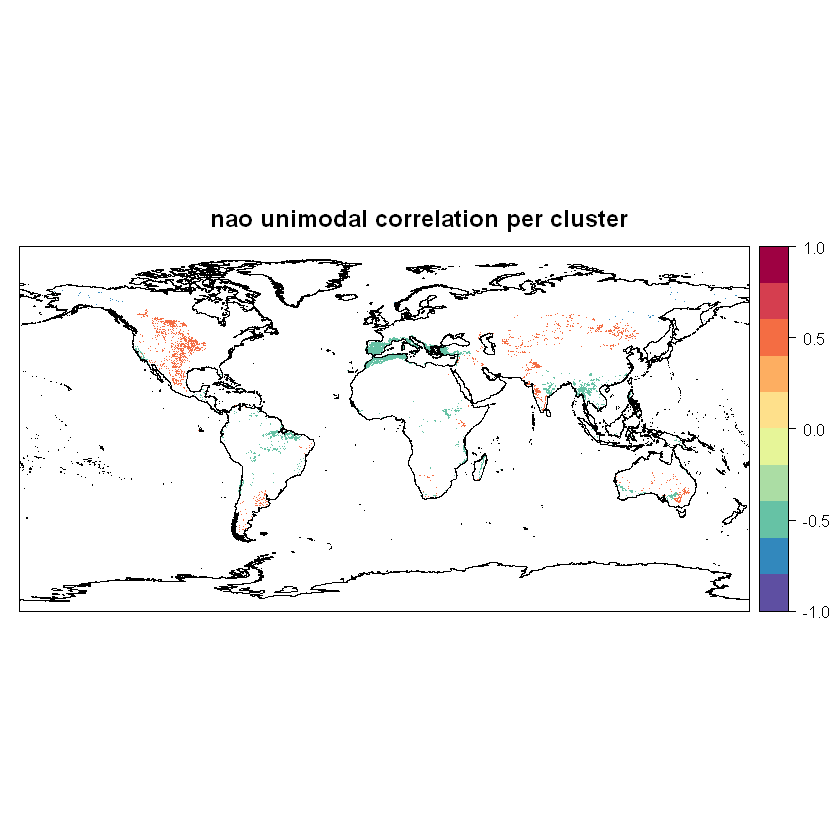

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

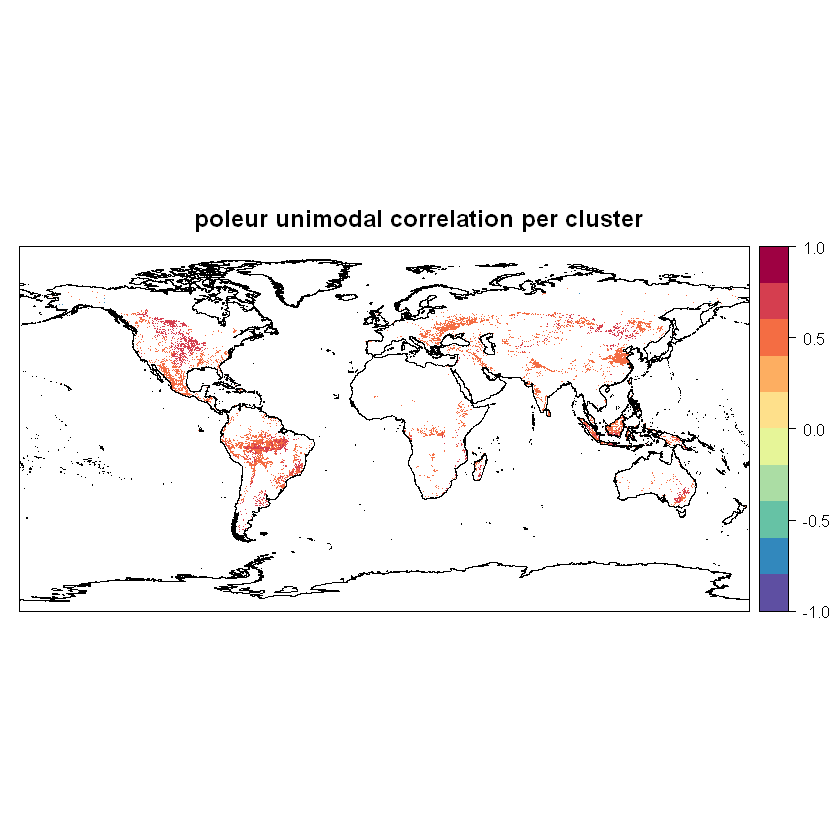

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

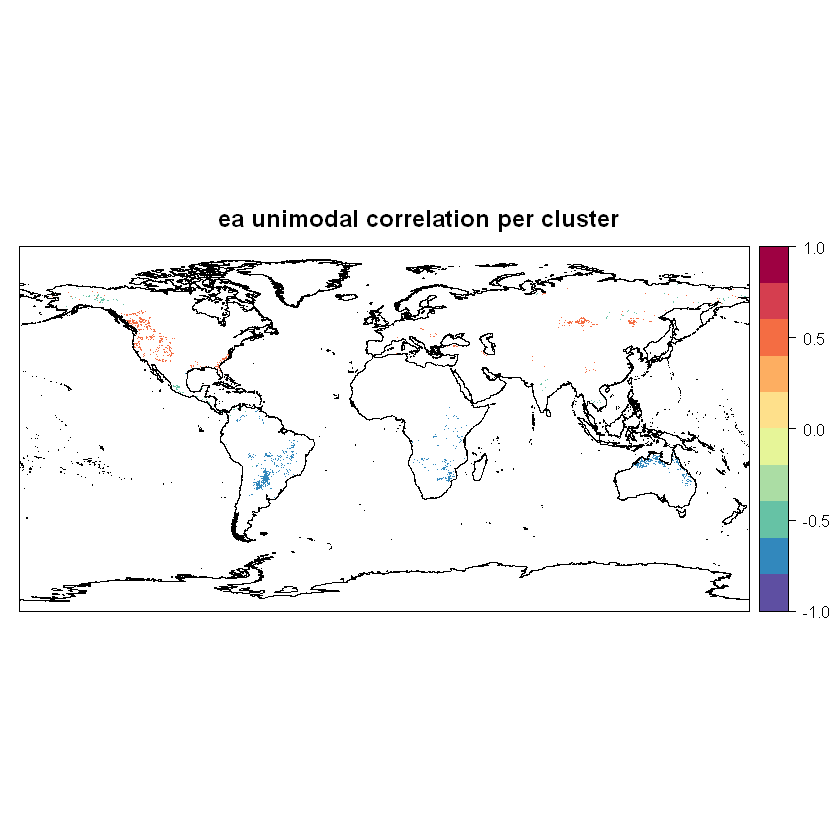

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

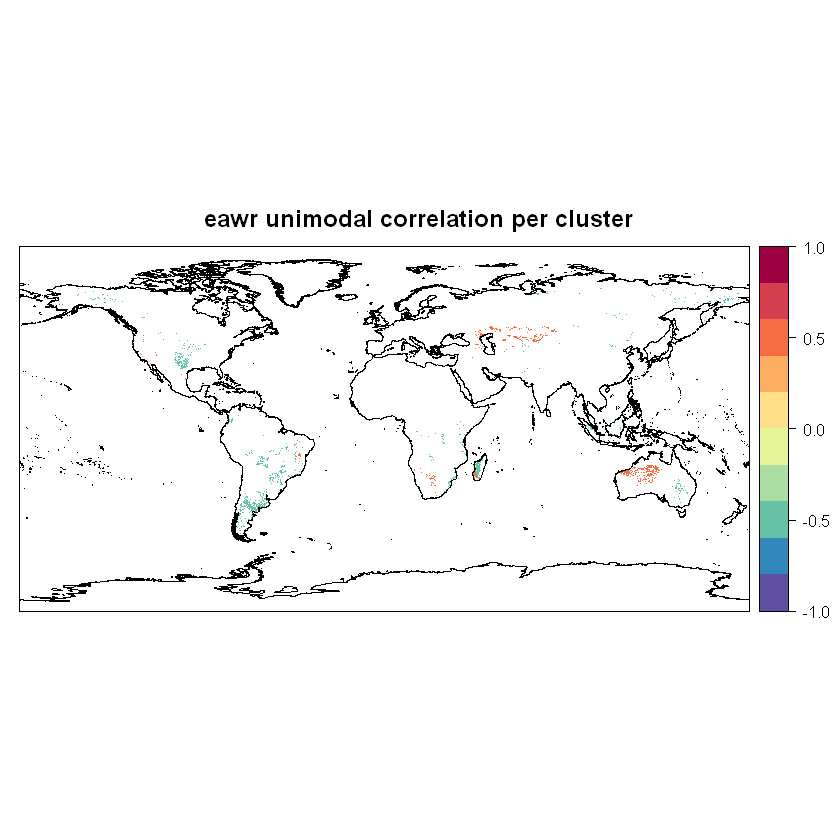

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

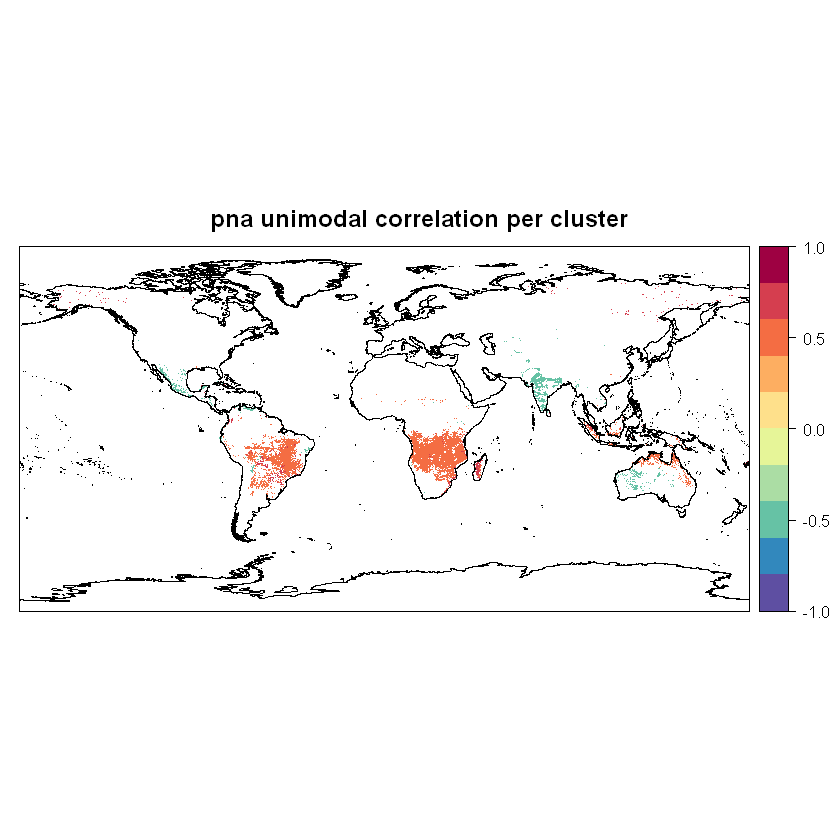

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

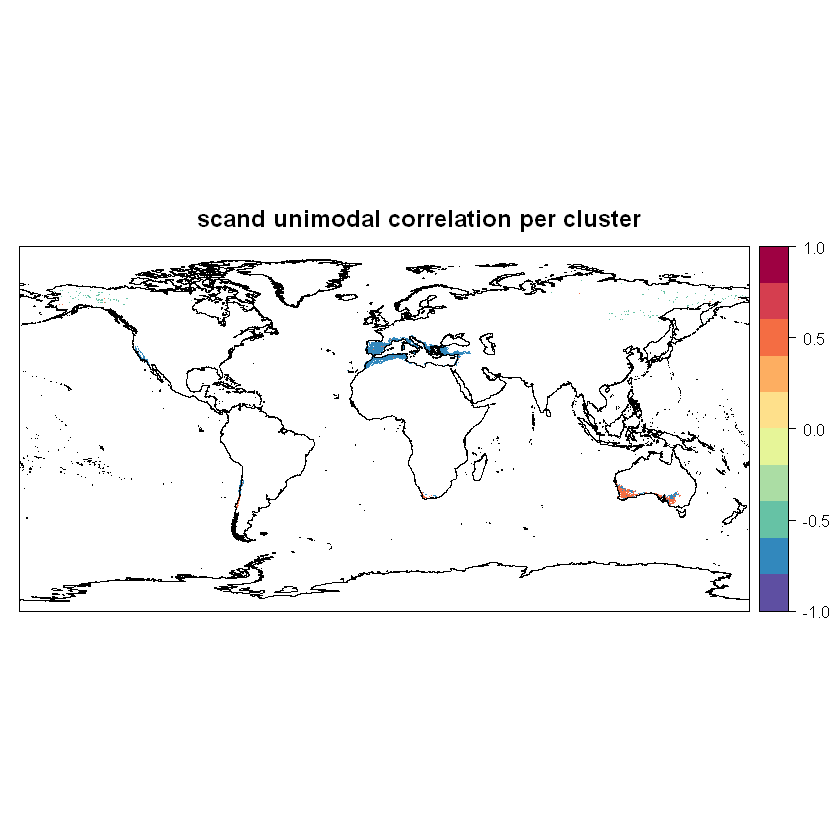

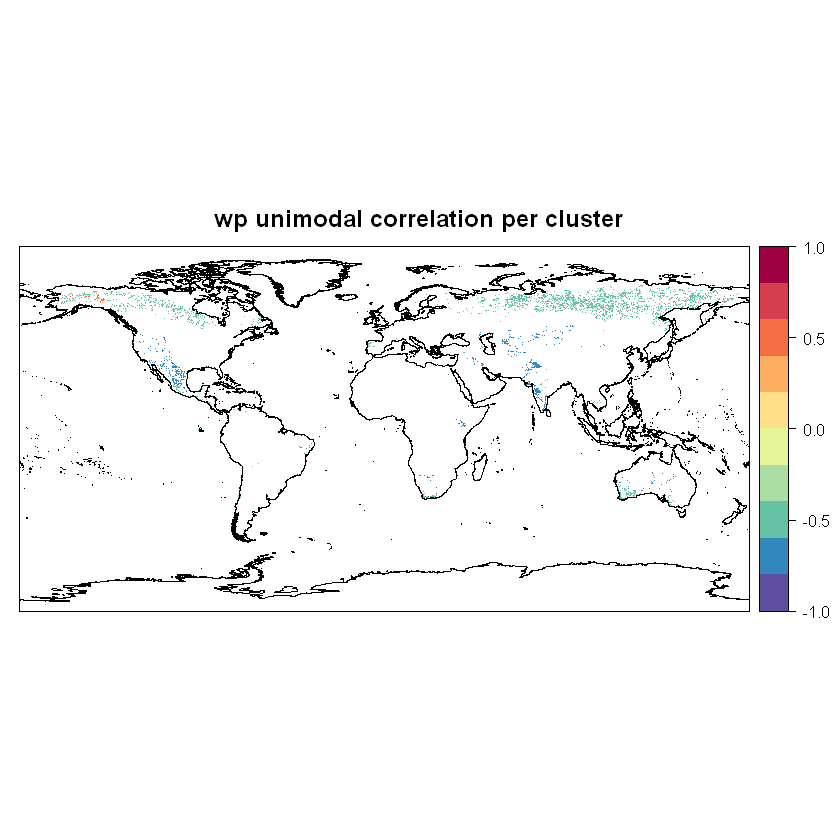

In [16]:
corr.df.delta.1 = masked_coords
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)
corr.df.delta.1 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.1, mode = 'unimodal', useDeltas = T, t = 1)

#save(corr.df.delta.1, file = 'corrDfDeltaAnnualClusLag1.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  48448 
Number of pixels correlated with more than  1  indexes  14371 
Number of pixels correlated with more than  2  indexes  2198 
Number of pixels correlated with more than  3  indexes  1327 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


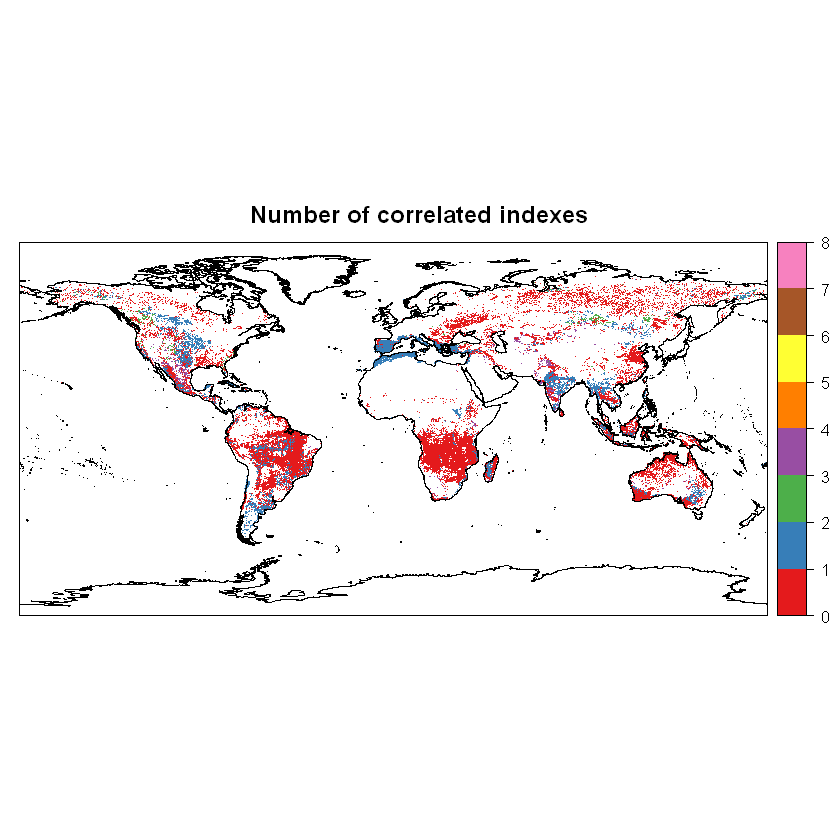

In [17]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.1$nao.pvalue<0.05), as.numeric(corr.df.delta.1$poleur.pvalue<0.05), as.numeric(corr.df.delta.1$ea.pvalue<0.05),
          as.numeric(corr.df.delta.1$eawr.pvalue<0.05), as.numeric(corr.df.delta.1$pna.pvalue<0.05), as.numeric(corr.df.delta.1$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.1$scand.pvalue<0.05), as.numeric(corr.df.delta.1$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

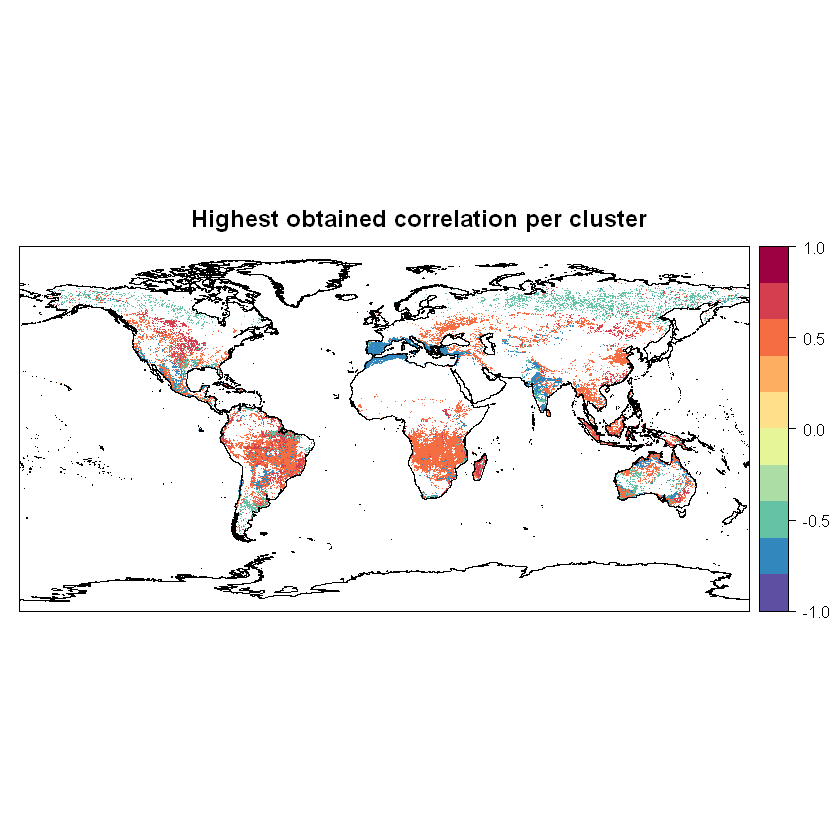

In [18]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest obtained correlation per cluster')

v = apply(corr.df.delta.1, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 2-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

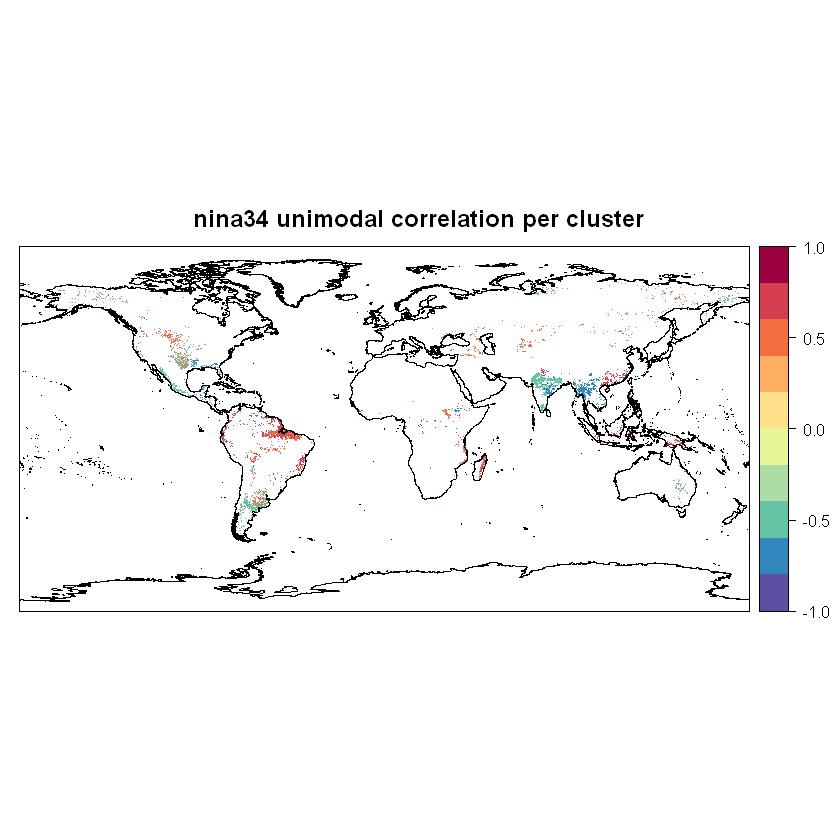

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

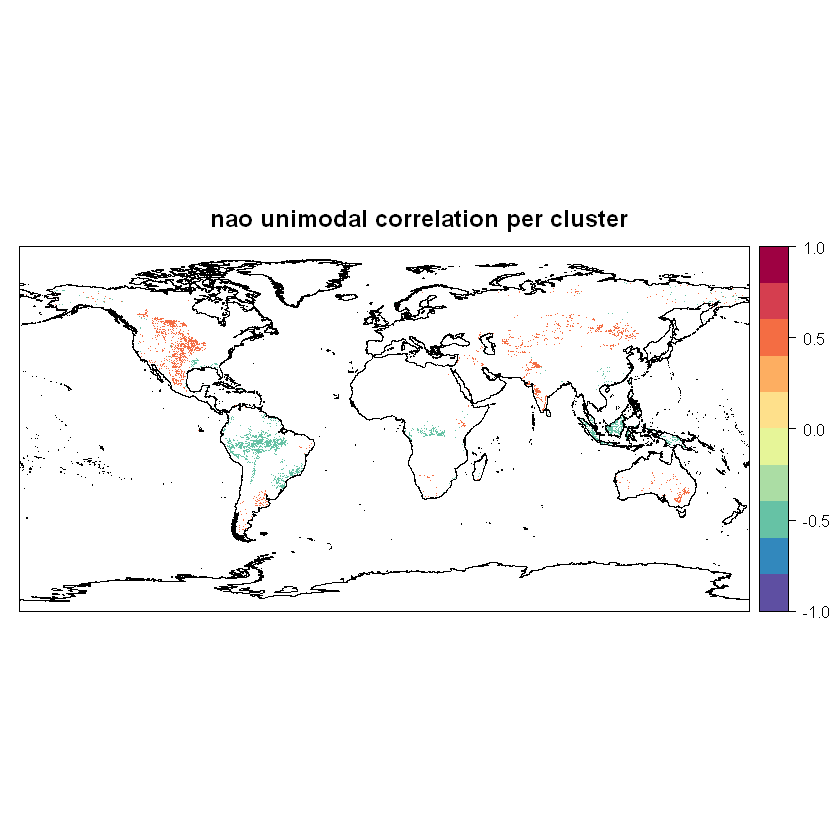

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

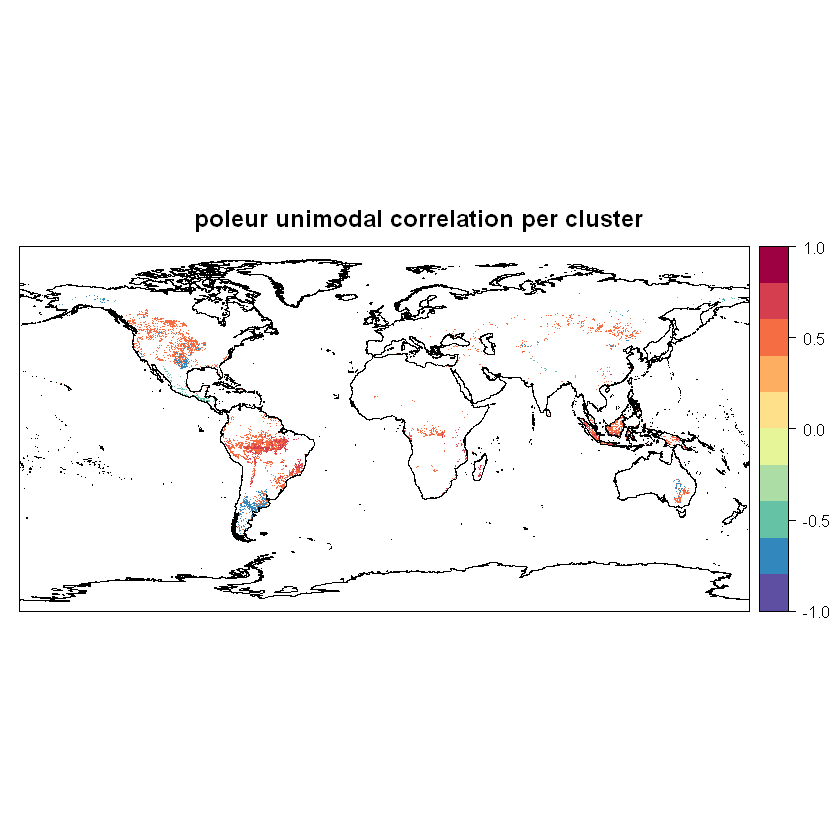

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

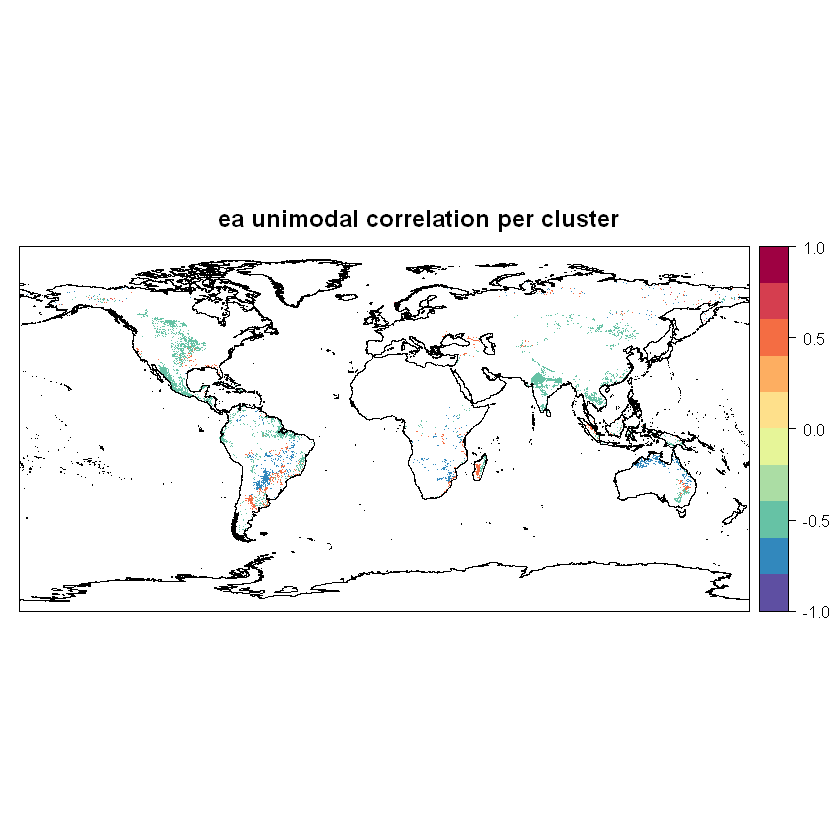

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

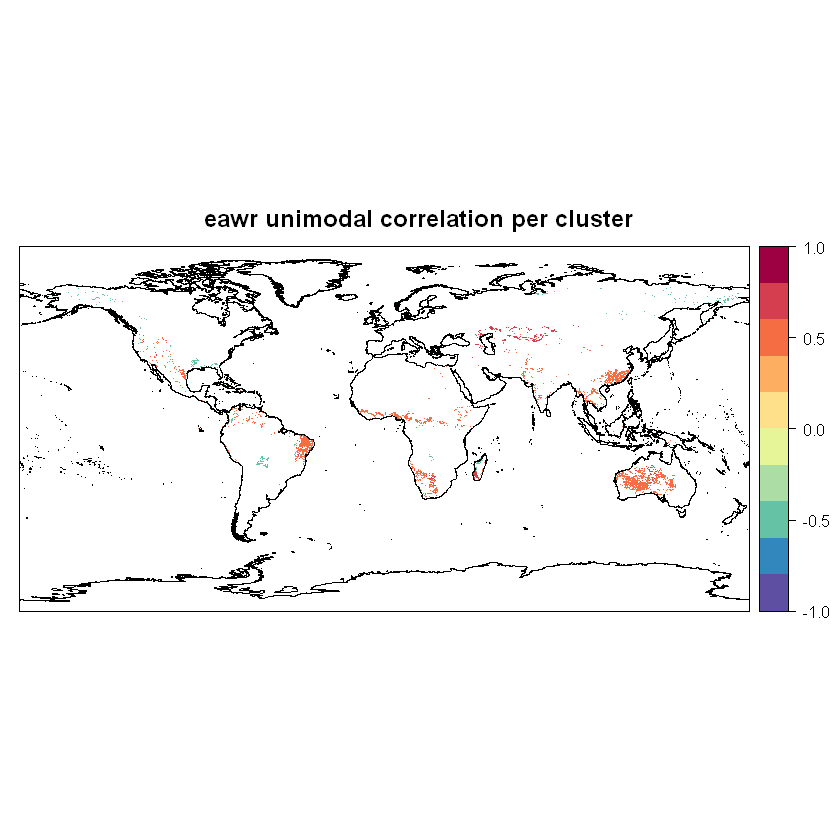

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

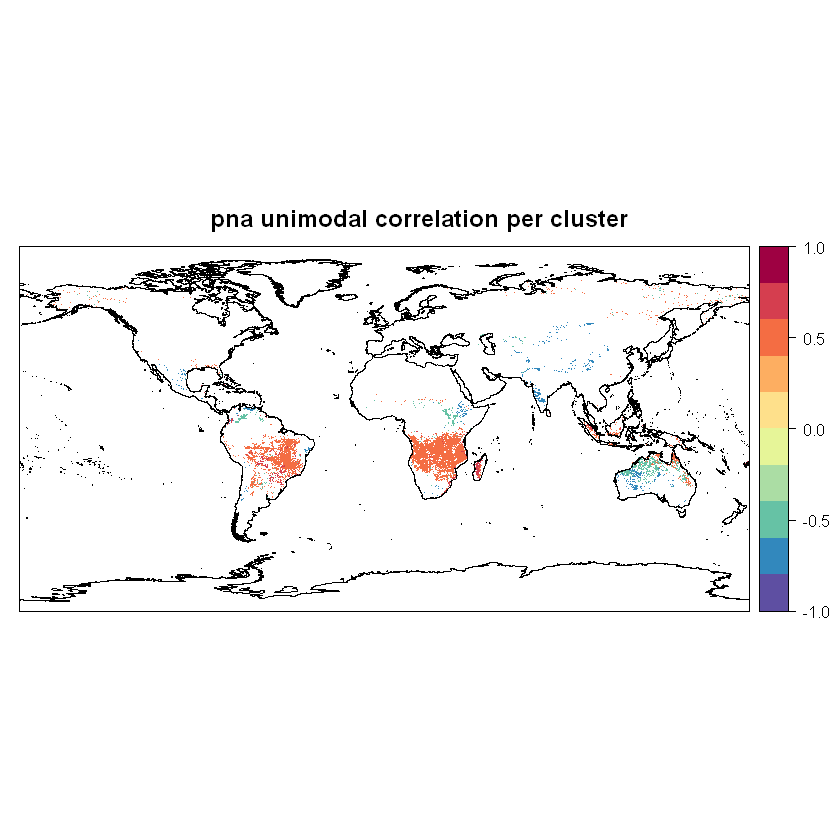

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

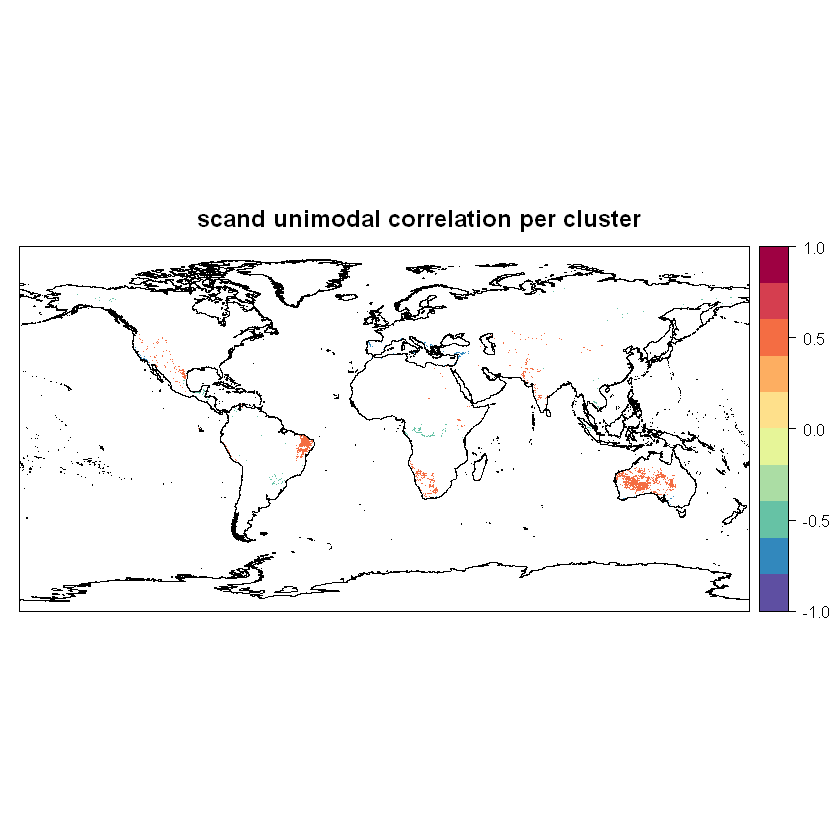

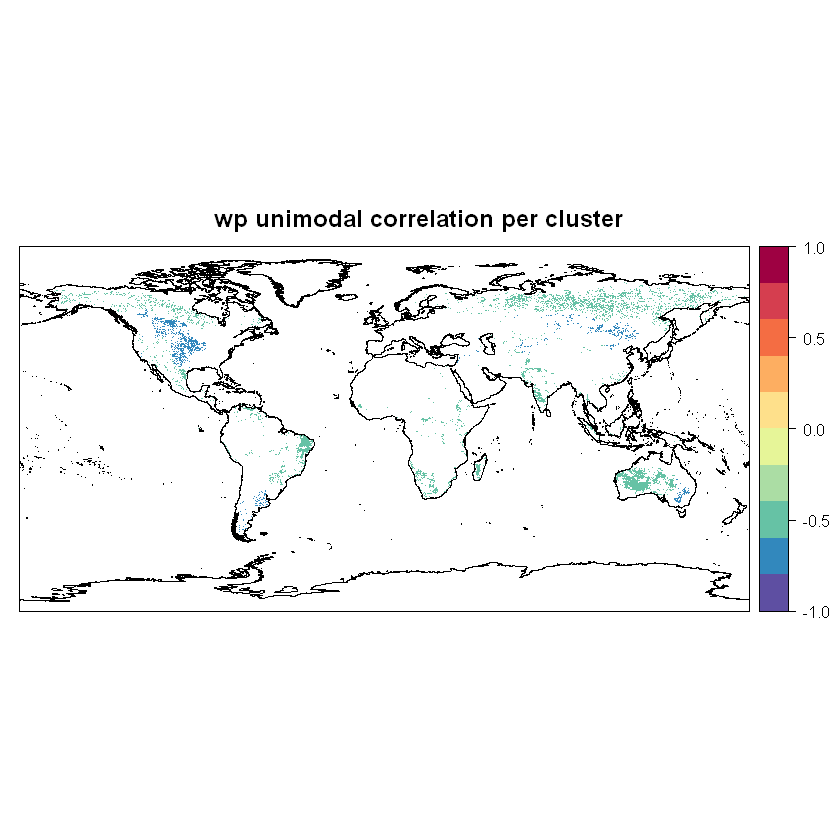

In [19]:
corr.df.delta.2 = masked_coords
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)
corr.df.delta.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.2, mode = 'unimodal', useDeltas = T, t = 2)

#save(corr.df.delta.2, file = 'corrDfDeltaAnnualClusLag2.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  44088 
Number of pixels correlated with more than  1  indexes  16927 
Number of pixels correlated with more than  2  indexes  6055 
Number of pixels correlated with more than  3  indexes  2209 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


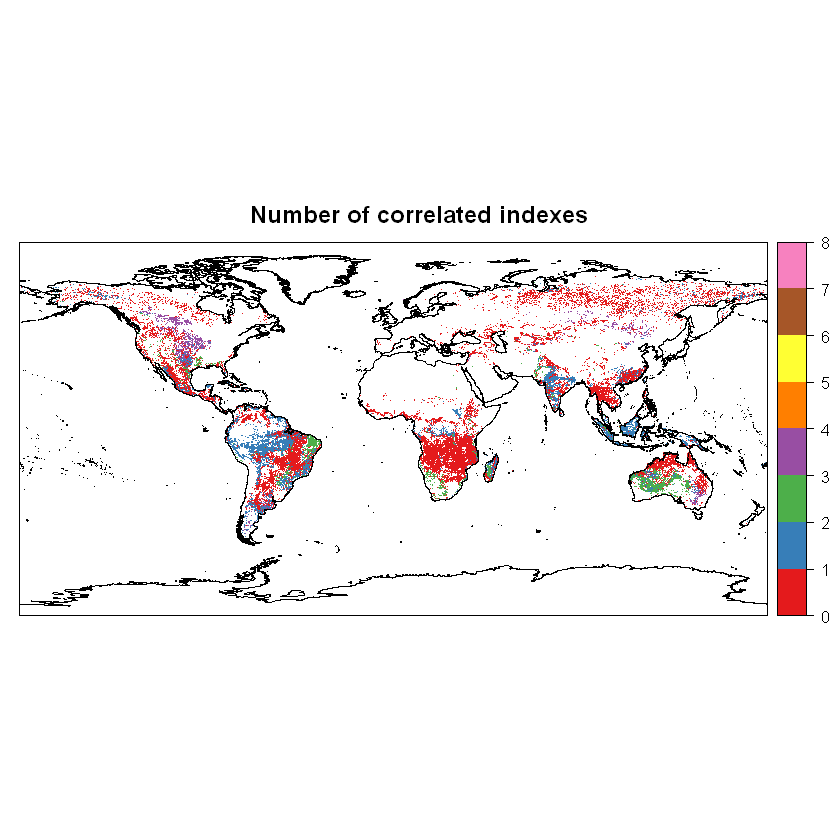

In [20]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.2$nao.pvalue<0.05), as.numeric(corr.df.delta.2$poleur.pvalue<0.05), as.numeric(corr.df.delta.2$ea.pvalue<0.05),
          as.numeric(corr.df.delta.2$eawr.pvalue<0.05), as.numeric(corr.df.delta.2$pna.pvalue<0.05), as.numeric(corr.df.delta.2$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.2$scand.pvalue<0.05), as.numeric(corr.df.delta.2$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

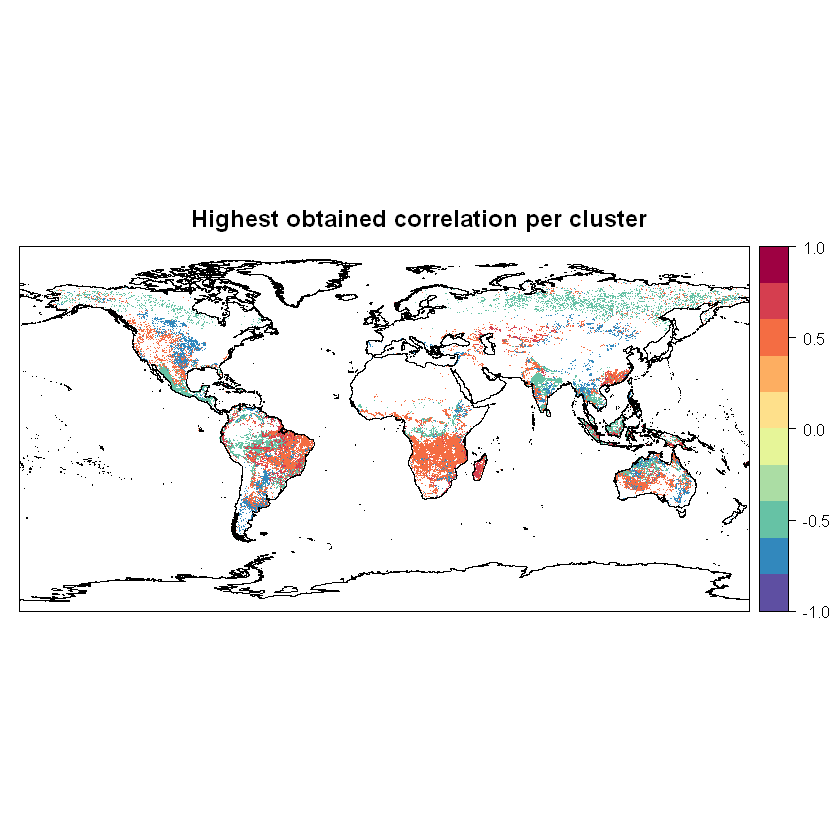

In [21]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest obtained correlation per cluster')

v = apply(corr.df.delta.2, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## With 3-months persistence

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

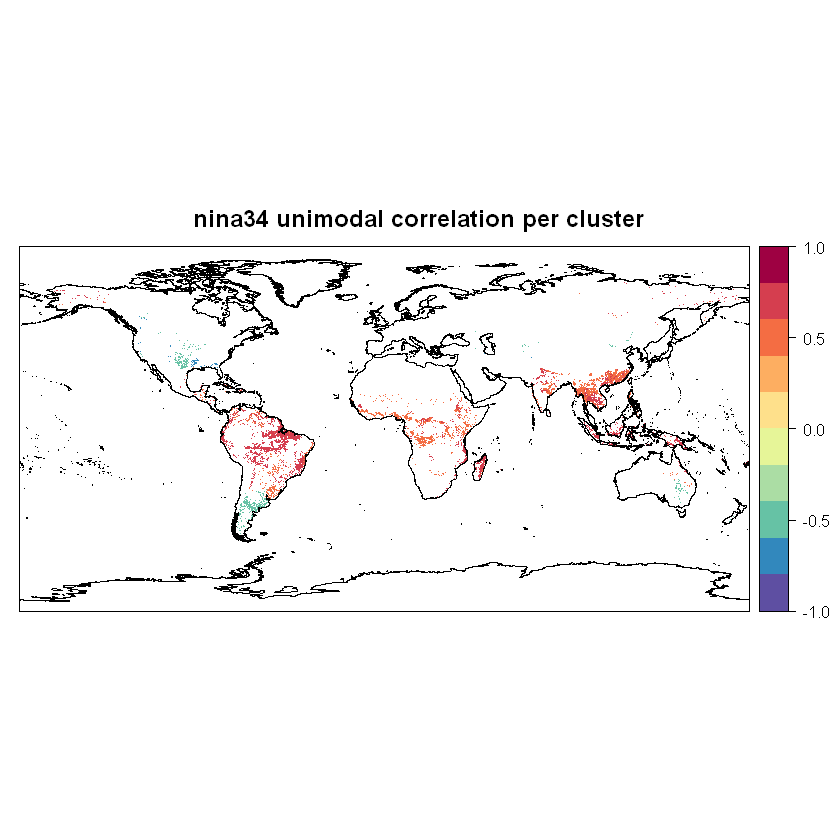

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

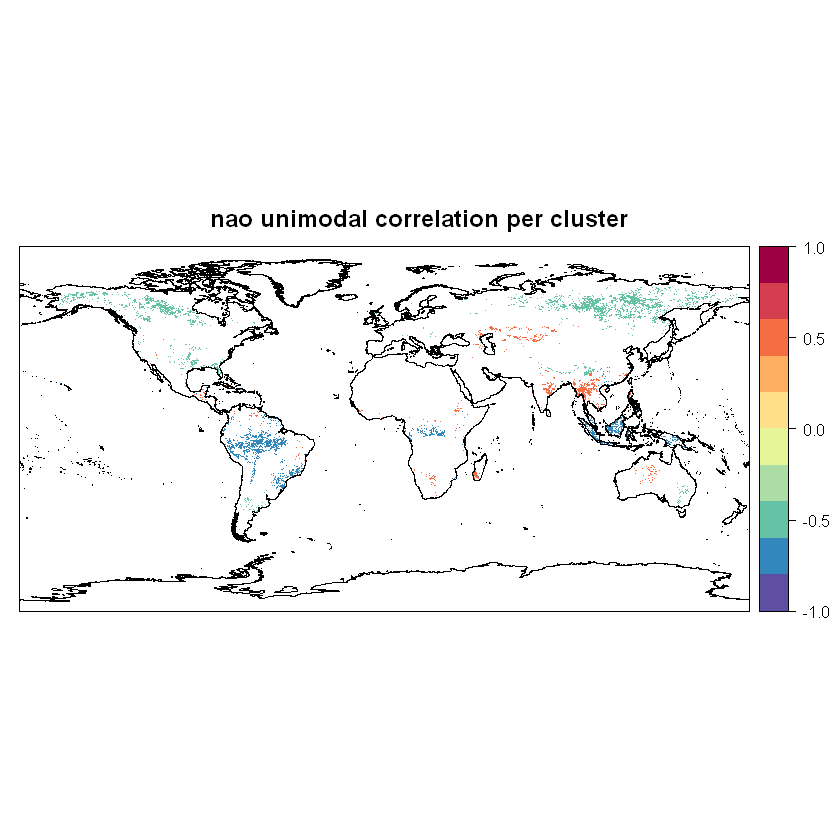

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

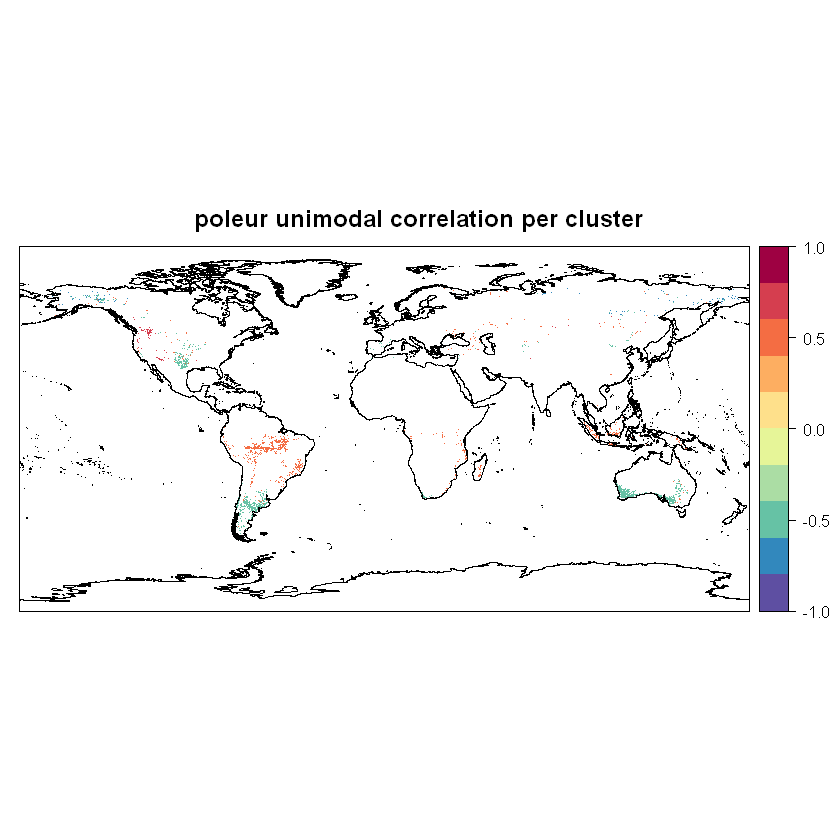

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

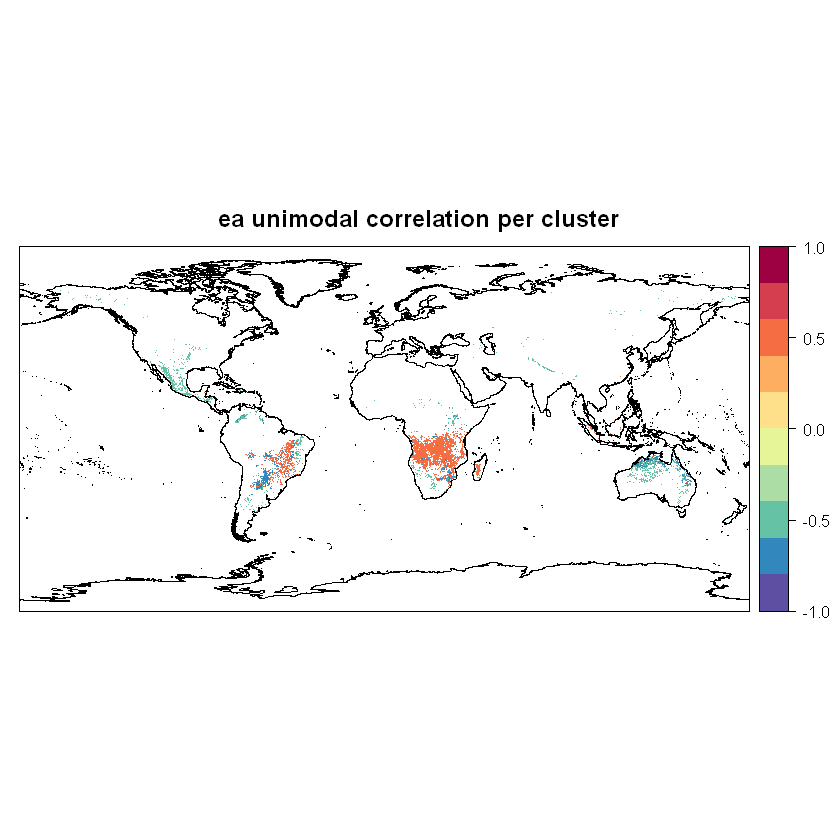

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

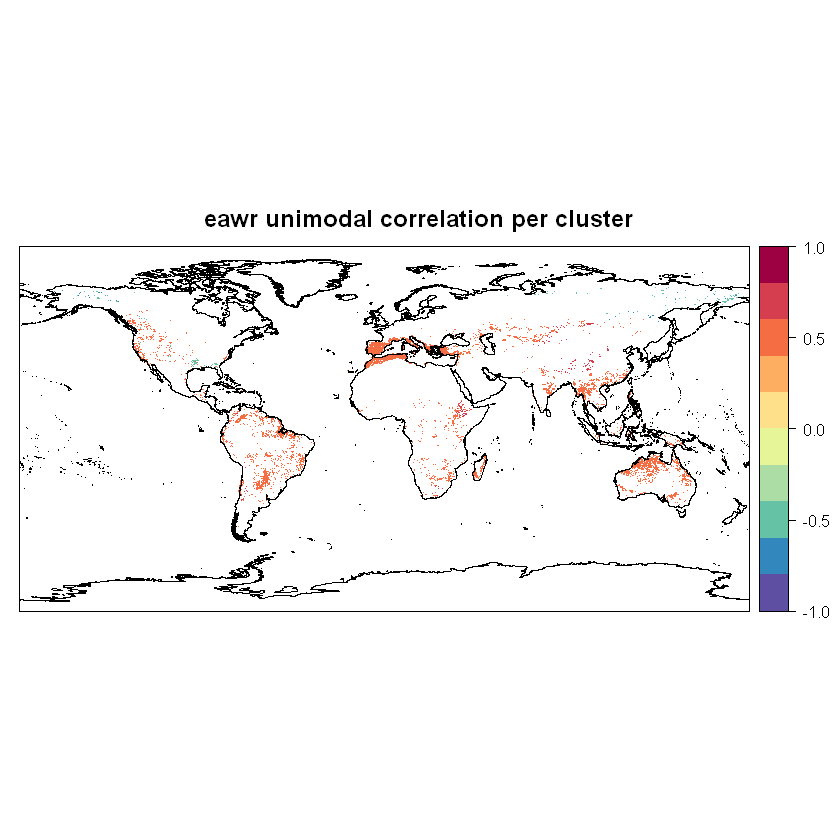

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

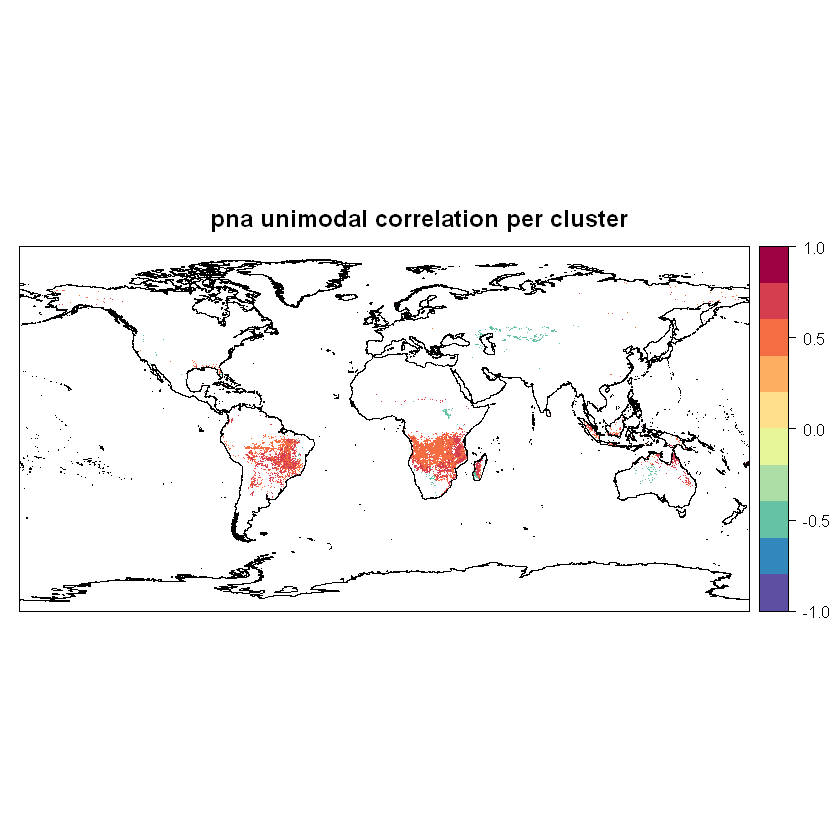

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

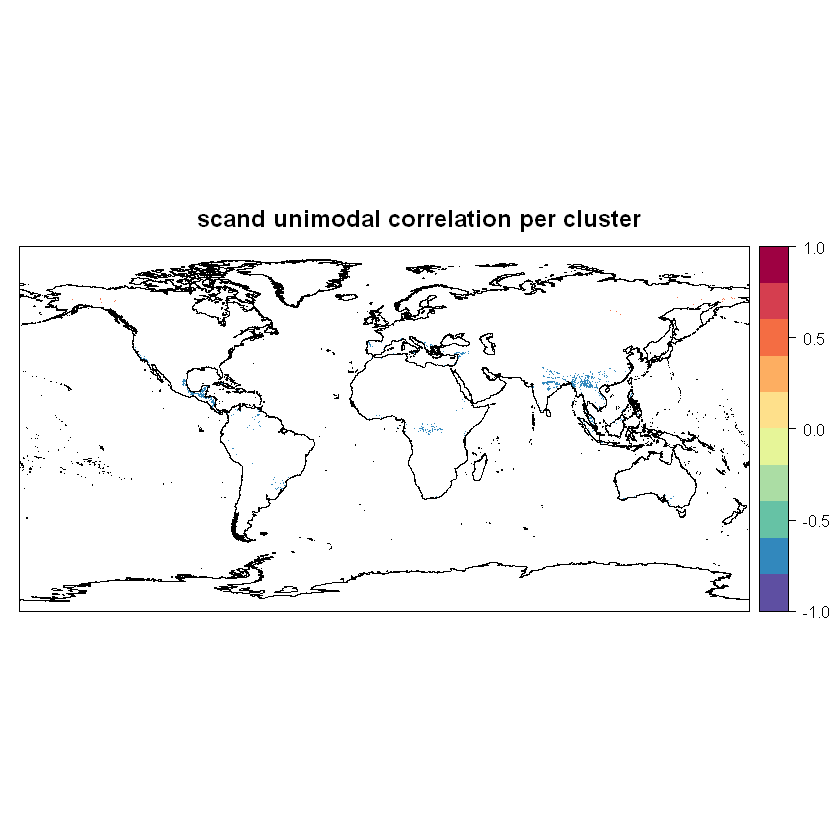

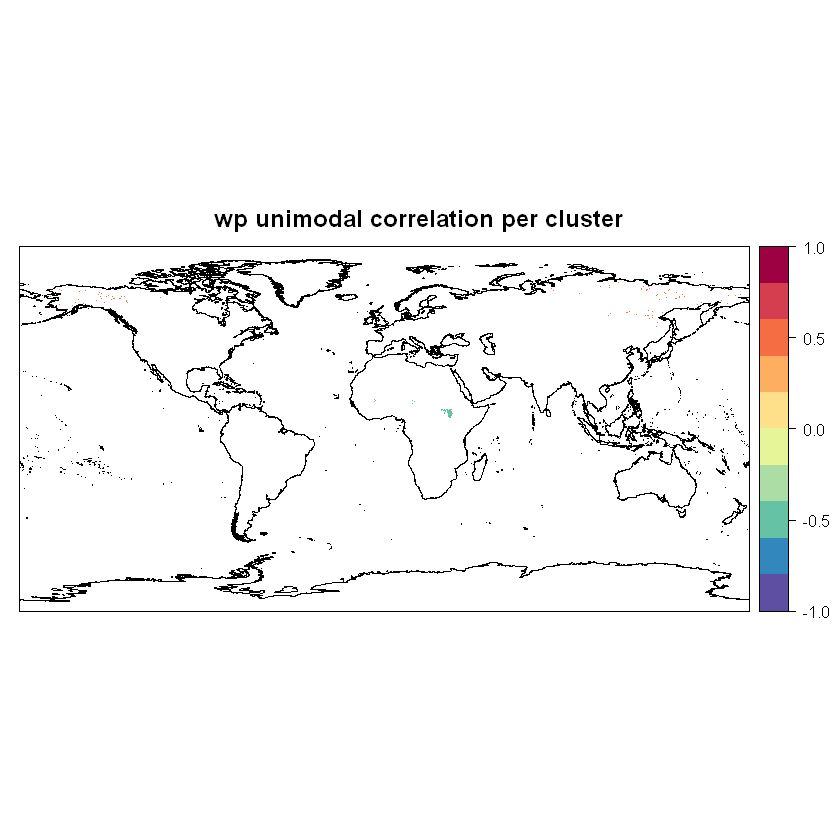

In [22]:
corr.df.delta.3 = masked_coords
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nina34, 'nina34',
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, nao, 'nao', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, poleur, 'poleur',
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, ea, 'ea', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, eawr, 'eawr', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, pna, 'pna', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, scand, 'scand', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)
corr.df.delta.3 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, masked_coords, dates, wp, 'wp', 
                           corr.df.delta.3, mode = 'unimodal', useDeltas = T, t = 3)

#save(corr.df.delta.3, file = 'corrDfDeltaAnnualClusLag3.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  41551 
Number of pixels correlated with more than  1  indexes  14847 
Number of pixels correlated with more than  2  indexes  3519 
Number of pixels correlated with more than  3  indexes  23 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


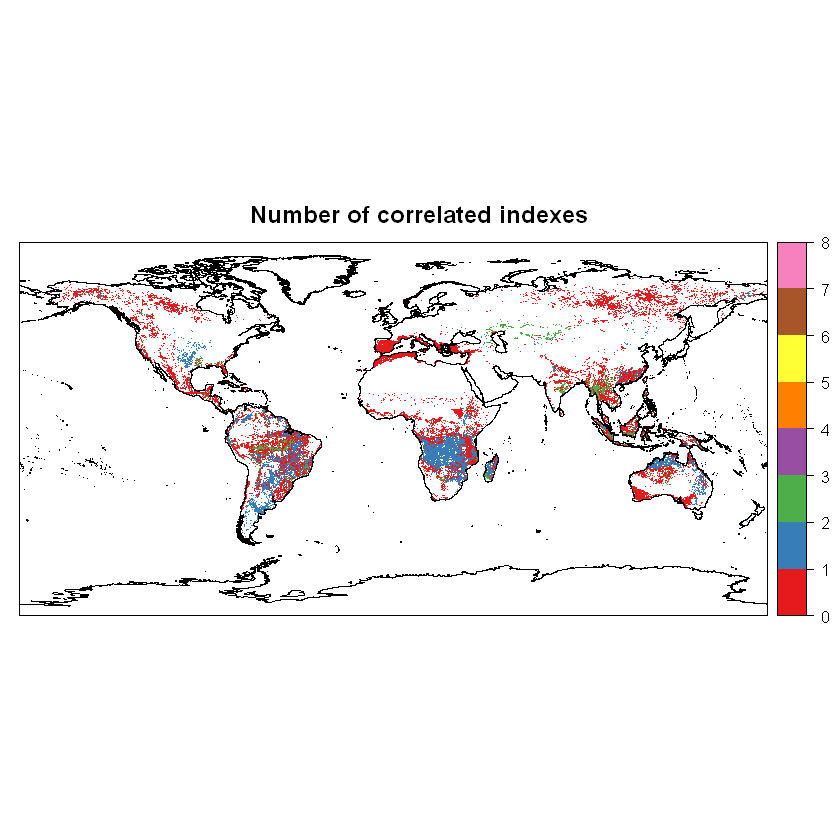

In [23]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.delta.3$nao.pvalue<0.05), as.numeric(corr.df.delta.3$poleur.pvalue<0.05), as.numeric(corr.df.delta.3$ea.pvalue<0.05),
          as.numeric(corr.df.delta.3$eawr.pvalue<0.05), as.numeric(corr.df.delta.3$pna.pvalue<0.05), as.numeric(corr.df.delta.3$nina34.pvalue<0.05), 
          as.numeric(corr.df.delta.3$scand.pvalue<0.05), as.numeric(corr.df.delta.3$wp.pvalue<0.05))

suma = rowSums(v, na.rm=T)
v <- suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(suma > i-1), '\n')
}

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

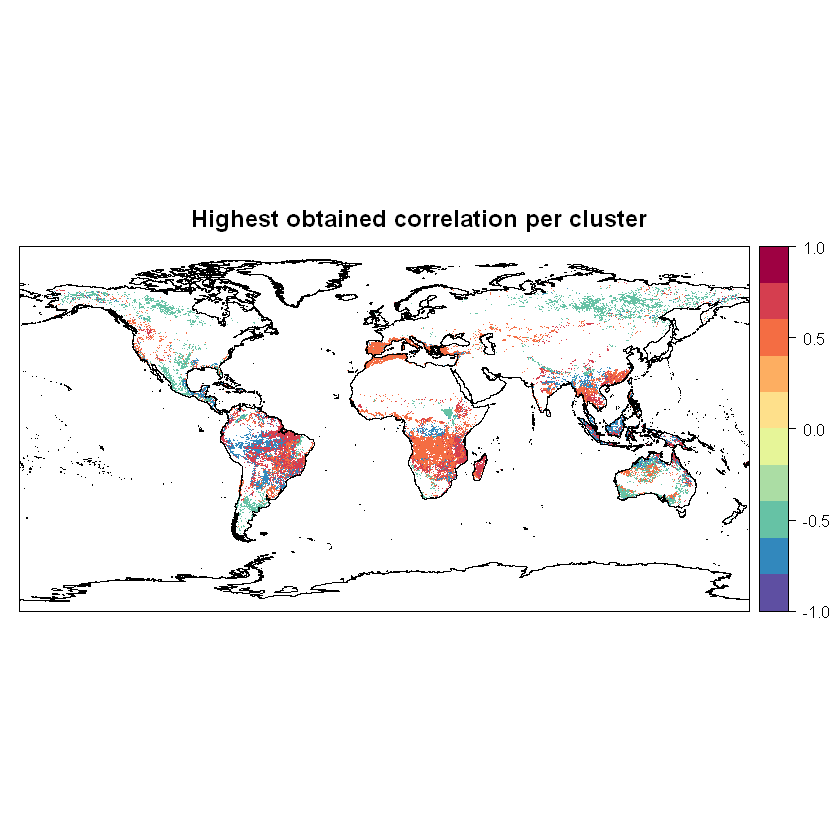

In [24]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest obtained correlation per cluster')

v = apply(corr.df.delta.3, 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

## Combining all

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

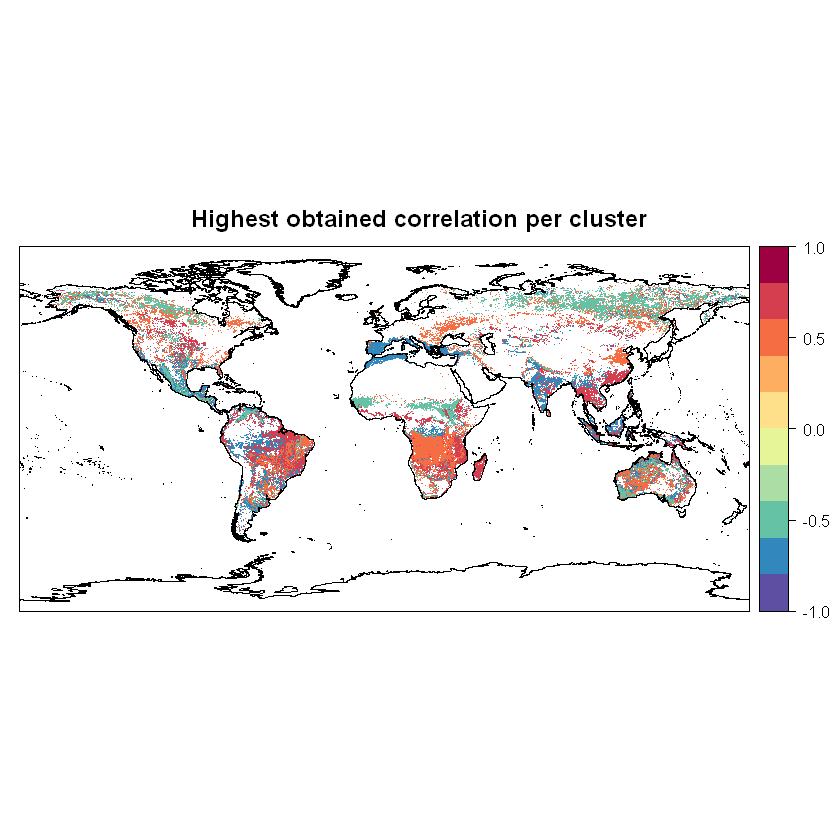

In [25]:
arg.list <- list(col.regions = group.colors[11:1][-6],
                      at = seq(-1, 1, 0.2), main = 'Highest obtained correlation per cluster')

v = apply(cbind(corr.df.delta, corr.df.delta.1[,-c(1,2)], corr.df.delta.2[,-c(1,2)], corr.df.delta.3[,-c(1,2)]), 1, function (x) getMaxCorr(x))

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()